<a href="https://colab.research.google.com/github/wrya-karimi/Airline_Sentiment_Analysis/blob/main/airline_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
print(pd.__version__)

1.4.3


#Load Dataset

In [47]:
tweets_df = pd.read_csv("https://raw.githubusercontent.com/satyajeetkrjha/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")

In [48]:
tweets_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [49]:
tweets_df.describe

<bound method NDFrame.describe of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativere

In [50]:
tweets_df.shape

(14640, 15)

In [51]:
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


##Detect Missing Value percent of each column

In [52]:
(tweets_df.isna().sum() / len(tweets_df)) * 100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

#Exploratory Data Analysis(EDA)
Exploratory Data Analysis refers to the critical process of performing initial investigations on data to discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

The overall objective of exploratory data analysis is to obtain vital insights and hence usually includes the following sub-objectives: 


*   Identifying and removing data outliers
*   Identifying trends in time and space
*   Uncover patterns related to the target
*   Creating hypotheses and testing them through experiments
*   Identifying new sources of data

## number of unique value of each column

In [53]:
tweets_df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [54]:
tweets_df['tweet_created'].min()

'2015-02-16 23:36:05 -0800'

##convert a scalar, array-like, Series or DataFrame to a pandas datetime object
Series.dt.date : Returns numpy array of python datetime.date objects.
Namely, the date part of Timestamps without time and timezone information.

In [55]:
print(type(tweets_df['tweet_created']))
tweets_df['tweet_created'] = pd.to_datetime(tweets_df['tweet_created']).dt.date
#tweets_df['tweet_created'] = pd.to_datetime(tweets_df['tweet_created'])

<class 'pandas.core.series.Series'>


In [56]:
print("Since: ", tweets_df['tweet_created'].min())
print("Until :", tweets_df['tweet_created'].max())
print("Number Of days :", tweets_df['tweet_created'].nunique())

Since:  2015-02-16
Until : 2015-02-24
Number Of days : 9


In [57]:
tweets_df.groupby('tweet_created').size()

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

##Checking Nan value in our dataset
Remove columns with maximum missing value

In [58]:
(tweets_df.isna().sum() / len(tweets_df)) * 100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [59]:
tweets_df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1, inplace= True)

In [60]:
(tweets_df.isna().sum() / len(tweets_df)) * 100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
name                             0.000000
retweet_count                    0.000000
text                             0.000000
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

##Reasons Of Negative Tweets

In [61]:
print("Number of negative reasons = ", tweets_df.negativereason.nunique())

Number of negative reasons =  10


In [62]:
print("Reasons Of Negative Tweets :")
print(tweets_df.negativereason.value_counts())

Reasons Of Negative Tweets :
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

palette = 'hls' = Return hues with constant lightness and saturation in the HLS system. The hues are evenly sampled along a circular path. The resulting palette will be appropriate for categorical or cyclical data.

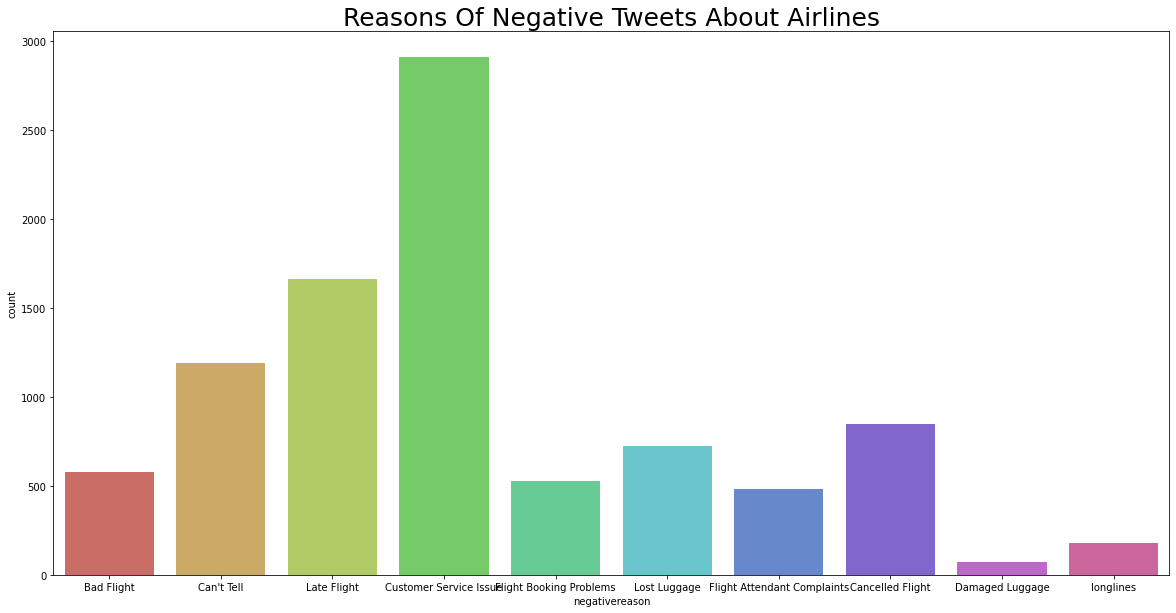

In [72]:
plt.figure(figsize=(20,10))
#seaborn.countplot = Show the counts of observations in each categorical bin using bars.
sns.countplot(x = 'negativereason', data = tweets_df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 25)
plt.show()